## CHAPTER 1
#### Network Analysis
- Example : Social , where we model the relationship between people.
- Example : Transportation, roads or flight paths

- Insights :
    - Important entities : influencers in social network
    - Pathfinding: most efficient transport path.
    - Clustering: Network communities

- Network Structure:
    -  Node - with node + Edges forms a network known as Graph
    -  Edge - 

Nodes= [1, 2, 3] Returns a list
Edges= [(1, 2)] Returns a tuple
Nodes with label = [(1, {'label': 'blue'}), (2, {}), (3, {})] Return the nodes with labels


/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


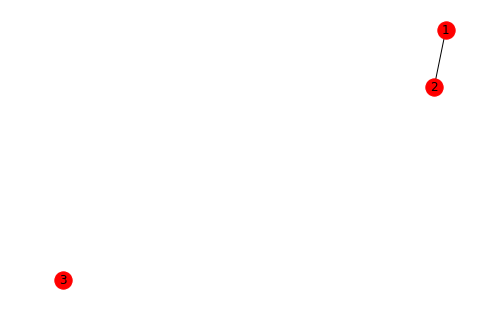

In [28]:
# Import newtworkx library 
import networkx as nx

# design a simple graph
G = nx.Graph()

# add nodes.
G.add_nodes_from([1,2,3])

# allows to See the nodes that are present
nodes = G.nodes()
print('Nodes=', nodes, 'Returns a list')

# adding an edge
G.add_edge(1,2)

# show the edge, the method G.edges() method returns the tuples that are on the edge.
edges = G.edges()
print('Edges=', edges, 'Returns a tuple')

# Meta-data can be stored on the graph as well
G.node[1]['label'] = 'blue'

# Retrieve the nodes
nodes_label = G.node(data=True)
print('Nodes with label =', nodes_label, 'Return the nodes with labels')

# Network also does drawing function with basic functionality knows as nx.draw(G)
nx.draw(G, with_labels=True)

# Call the matplotlib library to show the graph.
import matplotlib.pyplot as plt

_ = plt.show()

Basic drawing of a network using NetworkX
NetworkX provides some basic drawing functionality that works for small graphs. We have selected a subset of nodes from the graph for you to practice using NetworkX's drawing facilities. It has been pre-loaded as T_sub.

In [ ]:
# Import necessary modules
import networkx as nx
import matplotlib.pyplot as plt

# Draw the graph to screen
nx.draw(T_sub)
plt.show()

Queries on a graph
Now that you know some basic properties of the graph and have practiced using NetworkX's drawing facilities to visualize components of it, it's time to explore how you can query it for nodes and edges. Specifically, you're going to look for "nodes of interest" and "edges of interest". To achieve this, you'll make use of the .nodes() and .edges() methods that Eric went over in the video. The .nodes() method returns a list of nodes, while the .edges() method returns a list of tuples, in which each tuple shows the nodes that are present on that edge. Recall that passing in the keyword argument data=True in these methods retrieves the corresponding metadata associated with the nodes and edges as well.

You'll write list comprehensions to effectively build these queries in one line. For a refresher on list comprehensions, refer to Part 2 of DataCamp's Python Data Science Toolbox course. Here's the recipe for a list comprehension:

[ output expression for iterator variable in iterable if predicate expression ].

You have to fill in the _iterable_ and the _predicate expression_. Feel free to prototype your answer by exploring the graph in the IPython Shell before submitting your solution.

In [ ]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']
print(noi)
# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010,1,1)]


#### Types for Graphs

- Undirected Graphs
    - Facebook social networks does have undirected graphs
    - They are named "Undirected" becoz, their edges doesn't have information (inheritant directionality)


In [18]:
# Undirected Graphs
import networkx as nx
import matplotlib.pyplot as plt

# Graphs
G = nx.Graph()

# Know the Type
print(type(G), "undirected Graph")



<class 'networkx.classes.graph.Graph'> undirected Graph


#### Direct Graph
- The Graph that interacts with one-other is known as Directed Graph

#### Twitter's social graph
- They are called directed because, their edges have inheritant directionality (opp to undirected)

In [17]:
# Directed graph
import networkx as nx
import matplotlib.pyplot as plt

# nx.DiGraph() is direct graph
D = nx.DiGraph()

# inquire for type
print(type(D), "Directed Graph")

<class 'networkx.classes.digraph.DiGraph'> Directed Graph


#### Multi-Di-Graph
 - Multi-Di-Graph : Trip records between bike sharing stations.

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# Multigraph
M  = nx.MultiGraph()

# inquire the type
print(type(M), "MultiGraph")

# Like wise Multi-Di-Graph object
MD = nx.MultiDiGraph()

#Inquire the type
print(type(MD), "MultiDiGraph")


<class 'networkx.classes.multigraph.MultiGraph'> MultiGraph
<class 'networkx.classes.multidigraph.MultiDiGraph'> MultiDiGraph


#### Weight on the Graphs
- Sometimes, if the edges are of the same, then we can see n-types of edges points, those types can be merged with one by giving weight on it
- e.g. Suppose think, Node 1 to Node 2 have 3 edges between them, then at this moment we can add weight on the edge to 3 making to appear like one-edge

#### Selp loops
- Self loop is a graph that start in one edge and ends in the same edge.


Specifying a weight on edges
Weights can be added to edges in a graph, typically indicating the "strength" of an edge. In NetworkX, the weight is indicated by the 'weight' key in the metadata dictionary.

Before attempting the exercise, use the IPython Shell to access the dictionary metadata of T and explore it, for instance by running the commands T.edges[1, 10] and then T.edges[10, 1]. Note how there's only one field, and now you're going to add another field, called 'weight'.

In [ ]:
# Set the weight of the edge
T.edges[1,10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u,v]:

        # Set the weight to 1.1
        T.edges[u,v]['weight'] = 1.1

Exercise
Checking whether there are self-loops in the graph
As Eric discussed, NetworkX also allows edges that begin and end on the same node; while this would be non-intuitive for a social network graph, it is useful to model data such as trip networks, in which individuals begin at one location and end in another.

It is useful to check for this before proceeding with further analyses, and NetworkX graphs provide a method for this purpose: .number_of_selfloops().

In this exercise as well as later ones, you'll find the assert statement useful. An assert-ions checks whether the statement placed after it evaluates to True, otherwise it will throw an AssertionError.

To begin, use the .number_of_selfloops() method on T in the IPython Shell to get the number of edges that begin and end on the same node. A number of self-loops have been synthetically added to the graph. Your job in this exercise is to write a function that returns these edges.

In [ ]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

        # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))

#### Network Visualization
- Irrational vs Rational Visualization

##### Visualization using plot
    - Matrix Plots
    - Arc Plots
    - Circos Plots

1. Matrix Plot
    - Nodes are the Rows
    - Columns of the matrix, cells are filled where an edge exists or not
    - We can highlight edges with color (to determine the directionality)
    - If the graph is a directed graph, then matrix is not symmetrical

2. Arc Plot
    - The arc plot shows the node link diagram layout, in which are arcs plots and edges are drawn in circular arcs
    - They are ordered axis

3. Circos Plot
    - Circos plot is transformation of arc, plot such that the two egdes are joint in a circular curve

###### nxviz API



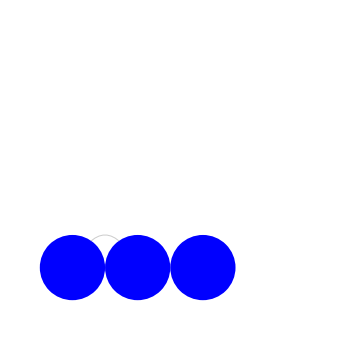

In [30]:
# import nxviz api
import nxviz as nv
import matplotlib.pyplot as plt

ap = nv.ArcPlot(G)

# Order the nodes based on by the "key"

# Draw the graph
ap.draw()

# show the graph
plt.show()

Visualizing using Matrix plots
It is time to try your first "fancy" graph visualization method: a matrix plot. To do this, nxviz provides a MatrixPlot object.

nxviz is a package for visualizing graphs in a rational fashion. Under the hood, the MatrixPlot utilizes nx.to_numpy_matrix(G), which returns the matrix form of the graph. Here, each node is one column and one row, and an edge between the two nodes is indicated by the value 1. In doing so, however, only the weight metadata is preserved; all other metadata is lost, as you'll verify using an assert statement.

A corresponding nx.from_numpy_matrix(A) allows one to quickly create a graph from a NumPy matrix. The default graph type is Graph(); if you want to make it a DiGraph(), that has to be specified using the create_using keyword argument, e.g. (nx.from_numpy_matrix(A, create_using=nx.DiGraph)).

One final note, matplotlib.pyplot and networkx have already been imported as plt and nx, respectively, and the graph T has been pre-loaded. For simplicity and speed, we have sub-sampled only 100 edges from the network.

In [ ]:
# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(T)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()

Visualizing using Circos plots
Circos plots are a rational, non-cluttered way of visualizing graph data, in which nodes are ordered around the circumference in some fashion, and the edges are drawn within the circle that results, giving a beautiful as well as informative visualization about the structure of the network.

In this exercise, you'll continue getting practice with the nxviz API, this time with the CircosPlot object. matplotlib.pyplot has been imported for you as plt.

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(T)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()


Exercise
Exercise
Visualizing using Arc plots
Following on what you've learned about the nxviz API, now try making an ArcPlot of the network. Two keyword arguments that you will try here are node_order='keyX' and node_color='keyX', in which you specify a key in the node metadata dictionary to color and order the nodes by.

matplotlib.pyplot has been imported for you as plt.

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(T)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# Create the customized ArcPlot object: a2
a2 = ArcPlot(T, node_order='category', node_color='category')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()
